# Description of the final project

## Introduction

This project consists of two parts. The first part is devoted to Computer Vision and based on the first four weeks of the course. The second part is on Natural Language Processing and based on weeks 5 and 6.


## Detailed Task Description

### Part 1: computer vision
In this part you are going to work with [FOOD-101](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), which contains images of various types of food - 101 classes in total.
The dataset contains the "images" folder with images for each food class, and a "meta" folder with annotations divided into train and test subsets. Annotations are provided in two formats JSON and TXT. You can use any of them. In both cases, the annotation file contains a list of image paths for each food class.

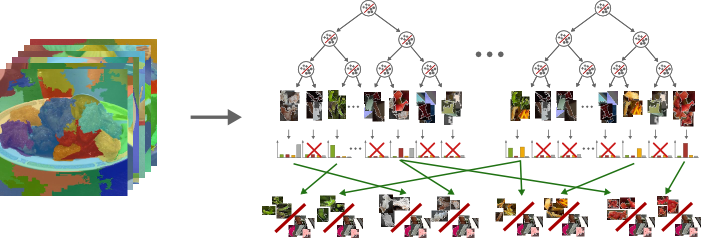

[Food-101 – Mining Discriminative Components with Random Forests](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf)

*Lukas Bossard, Matthieu Guillaumin, Luc Van Gool*

In this part of the task you should perform all the model training on train data and evaluate your models on test data.



Use **[accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)** metric for scoring.



### [5%] 1. Data analysis


* 1.1  (3%) Download the [FOOD-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), visualize several examples from different classes and calculate basic statistics (example number, class distribution, etc.).

**Note:** If you have limited computional resources, you can use only a subset of the original dataset which contains 10 or 50 classes. *There will be no punishement for this*. You can choose any classes you like from the original 101. If you decide to use fewer classes, please write this clearly in your solution and provide a reason for choosing this option.

* 1.2  (2%) Split the data from train into `current_train` and `current_val` (`val_size = 10%`). Do not forget to fix `random_state` for reproducibility.

### [15%] 2. ResNet Fine-tuning
* 2.1   Take pre-trained [ResNet](https://pytorch.org/vision/main/models/resnet.html) from torchvision (you may take either `ResNet34` or `ResNet50` pre-trained on ImageNet).
* 2.2  (10%) Fine-tune pre-trained ResNet on `current_train` created in 1.2. Do not forget about validation on `current_val` created in 1.2 in process of training.
* 2.3  (5%) Evaluate your fine-tuned model (use accuracy metric and data from test part for the evaluation), analyze the results and make conclusions.

**Note:** If you decide to use only a subset of the food classes for model training, then you also only need to use the same classes from the test set for evaluation.

### [20%] 3. Vit Fine-tuning
In this part you are going to fine-tune [ViT](https://huggingface.co/docs/transformers/model_doc/vit) model from HuggingFace library.
* 3.1   Study the [tutorial](https://colab.research.google.com/github/huggingface/notebooks/blob/main/examples/image_classification.ipynb#scrollTo=X9DDujL0q1ac) on fine-tuning Vit model from transformers library.

**Note:** this part is not graded. However, you may find the material from the tutorial useful  for the successful completion of the task.
* 3.2  (5%) Take [Vit](https://huggingface.co/docs/transformers/model_doc/vit) model from HuggingFace library and initialize it with the [weights pre-trained on ImageNet](https://huggingface.co/google/vit-base-patch16-224).
* 3.3  (10%) Similarly to point 2, fine-tune this model on on `current_train` created in 1.2. Do not forget about validation on `current_val` created in 1.2 in process of training.
* 3.4  (5%) Evaluate your fine-tuned model (use accuracy metric and data from test part for the evaluation), analyze the results and make conclusions.

**Note** If you decide to use only a subset of the food classes for model training, then you also only need to use the same classes from the test set for evaluation.

### [10%] 4. Summary & results analysis


* 4.1    (5%) Compare the results of the tested models. First, compare them between each other (ResNet vs ViT), that with other models on [leaderboard](https://paperswithcode.com/sota/image-classification-on-food-101-1).



* 4.2    (5%) Propose, how you may improve the model score (write at least three ideas).




In [1]:
!pip install torchmetrics transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import random
from torchmetrics.classification import Accuracy
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from transformers import ViTFeatureExtractor, ViTForImageClassification,BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup,BertTokenizer
from torchmetrics.classification import Accuracy
import cv2
import pandas as pd
from torch.utils.data import Dataset, DataLoader, Subset, TensorDataset
from sklearn.model_selection import train_test_split
from torchvision import transforms
import torchvision
from sklearn.metrics import accuracy_score, matthews_corrcoef
from torch.utils.data import
from transformers import BertTokenizer
import seaborn as sns
import string



##**1. Data analysis**


###1.1 Download the FOOD-101 dataset, visualize several examples from different classes and calculate basic statistics (example number, class distribution, etc.).

In [3]:
# Donwloading food101 dataset
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2023-09-22 13:58:42--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2023-09-22 13:58:42--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  15.2MB/s    in 5m 5s   

2023-09-22 14:03:48 (15.6 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



In [4]:
# !rm -rf food101

In [5]:
!mkdir food101
!tar -xzvf "food-101.tar.gz" -C "food101/"

Выходные данные были обрезаны до нескольких последних строк (5000).
food-101/images/cannoli/695879.jpg
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-10

In [6]:
source_dir = r"food101/food-101"

I chose 10 class classification due to limited GPU power of google colab and no local gpu included in my pc. So, i pick only 10 classes out of 101

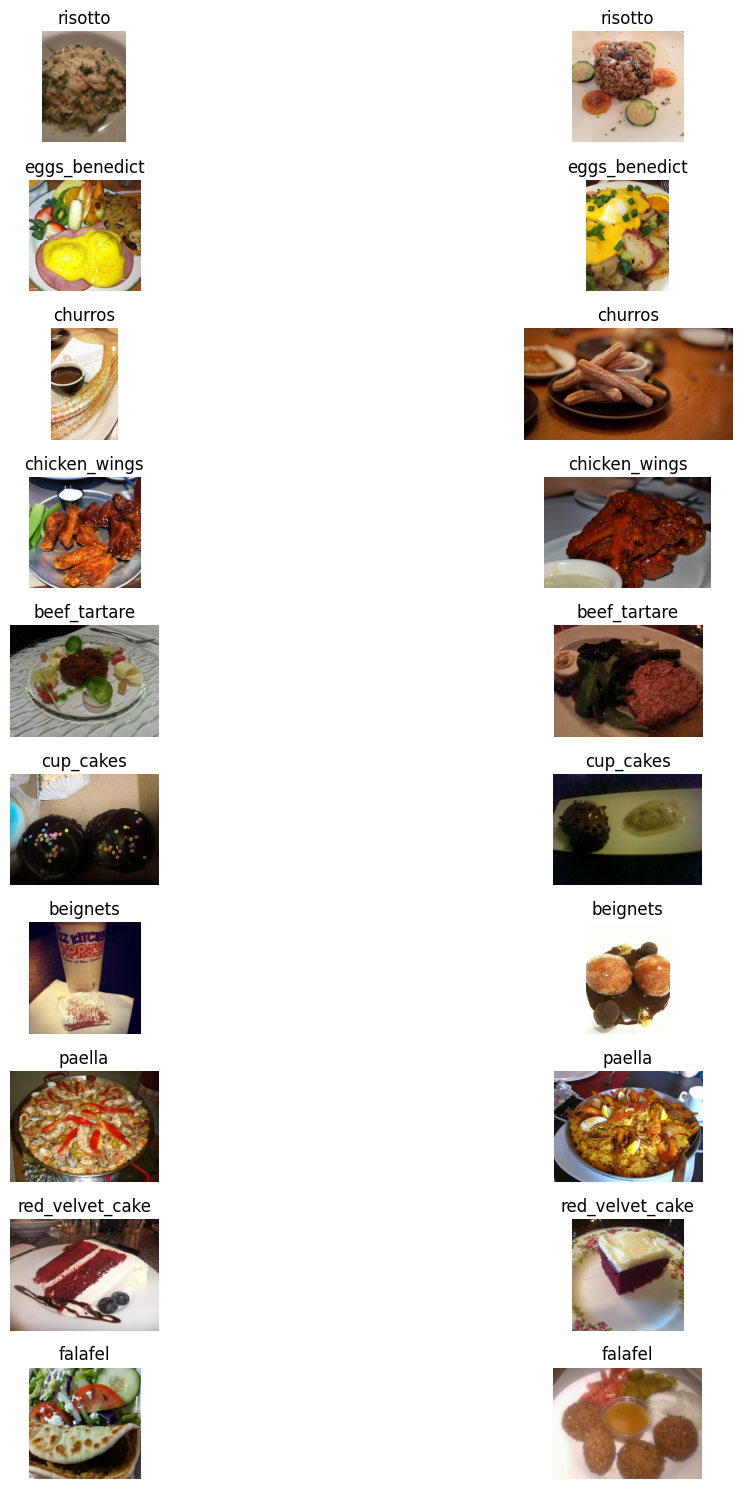

In [7]:
#visualization of dataset. Visualized only 10 classes
dataset_dir = os.path.join(source_dir, "images")

class_dirs = os.listdir(dataset_dir)[:10]

num_examples_per_class = 2
num_rows = 10
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, class_dir in enumerate(class_dirs):
    class_path = os.path.join(dataset_dir, class_dir)
    class_images = os.listdir(class_path)
    random.shuffle(class_images)
    class_images = class_images[:num_examples_per_class]

    for j, image_filename in enumerate(class_images):
        if j >= num_examples_per_class:
            break

        image_path = os.path.join(class_path, image_filename)
        image = Image.open(image_path)
        axs[i % num_rows, i // num_rows * num_examples_per_class + j].imshow(image)
        axs[i % num_rows, i // num_rows * num_examples_per_class + j].axis('off')
        axs[i % num_rows, i // num_rows * num_examples_per_class + j].set_title(class_dir)

# for i in range(len(class_dirs), num_rows * num_cols):
#     fig.delaxes(axs[i // num_rows, i % num_rows])

plt.tight_layout()
plt.show()

In [8]:
num_classes = len(class_dirs)
num_images_per_class = []
total_num_images = 0
image_dimensions = []
max_, min_ = -1000, 1000
for class_dir in class_dirs:
    class_path = os.path.join(dataset_dir, class_dir)
    class_images = os.listdir(class_path)

    num_images = len(class_images)
    num_images_per_class.append(num_images)
    total_num_images += num_images

    for image_filename in class_images:
        image_path = os.path.join(class_path, image_filename)
        image = cv2.imread(image_path)
        min_, max_ = min(min_, image.min()), max(max_, image.max())
        height, width, _ = image.shape
        image_dimensions.append((height, width))

heights, widths = zip(*image_dimensions)
mean_height = np.mean(heights)
mean_width = np.mean(widths)
stddev_height = np.std(heights)
stddev_width = np.std(widths)

resolution_counts = {}
for resolution in image_dimensions:
    resolution_counts[resolution] = resolution_counts.get(resolution, 0) + 1
most_common_resolution = max(resolution_counts, key=resolution_counts.get)

file_sizes = [os.path.getsize(os.path.join(dataset_dir, class_dir, image)) for class_dir in class_dirs for image in os.listdir(os.path.join(dataset_dir, class_dir))]
avg_file_size = np.mean(file_sizes)
max_file_size = max(file_sizes)

print(f"Number of Classes: {num_classes}")
print(f"Number of Images per Class: {num_images_per_class}")
print(f"Total Number of Images: {total_num_images}")
print(f"Mean Image Dimensions (height x width): {mean_height} x {mean_width}")
print(f"Standard Deviation of Image Dimensions: {stddev_height} x {stddev_width}")
print(f"Most Common Image Resolution: {most_common_resolution[0]} x {most_common_resolution[1]}")
print(f"Min pixel intensity: {min_}, Max pixel intensity: {max_}")

Number of Classes: 10
Number of Images per Class: [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Total Number of Images: 10000
Mean Image Dimensions (height x width): 475.5526 x 495.798
Standard Deviation of Image Dimensions: 64.73525958270345 x 45.46255597741948
Most Common Image Resolution: 512 x 512
Min pixel intensity: 0, Max pixel intensity: 255


In [9]:
# !rm -rf /content/food101/food-101/images/train
# !rm -rf /content/food101/food-101/images/validation

### 1.2 Split the data from train into current_train and current_val (val_size = 10%). Do not forget to fix random_state for reproducibility.

In [10]:
tag2idx = {k:i for i, k in enumerate(class_dirs)}
idx2tag= {v:k for k,v in tag2idx.items()}

print('\n Label to index:\n ', tag2idx, '\n Index to label:\n ', idx2tag)


 Label to index:
  {'risotto': 0, 'eggs_benedict': 1, 'churros': 2, 'chicken_wings': 3, 'beef_tartare': 4, 'cup_cakes': 5, 'beignets': 6, 'paella': 7, 'red_velvet_cake': 8, 'falafel': 9} 
 Index to label:
  {0: 'risotto', 1: 'eggs_benedict', 2: 'churros', 3: 'chicken_wings', 4: 'beef_tartare', 5: 'cup_cakes', 6: 'beignets', 7: 'paella', 8: 'red_velvet_cake', 9: 'falafel'}


In [11]:
train_annotation_file = os.path.join(source_dir, "meta/train.txt")
test_annotation_file = os.path.join(source_dir, "meta/test.txt")

class Food101Dataset(Dataset):
    def __init__(self, dataset_dir, annotation_file, transform=None, tags = None, subset=None):
        self.dataset_dir = dataset_dir
        self.transform = transform
        self.tags = tags
        self.annotations = pd.read_csv(annotation_file, sep="/", header=None, names=["label", "filename"])
        if subset:
          self.annotations = self.annotations[self.annotations['label'].isin(subset)]

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        label = self.annotations.iloc[idx, 0]
        filename = self.annotations.iloc[idx, 1]
        image_path = os.path.join(self.dataset_dir, label, str(filename)+'.jpg')
        image = Image.open(image_path)
        # image = np.array(image, dtype=np.float32) / 255.0
        # image = torch.from_numpy(image)
        # image = image.transpose(0, 2)


        if self.transform:
            image = self.transform(image)


        return image, self.tags[label]


train_annotation_file = os.path.join(source_dir, "meta/train.txt")
test_annotation_file = os.path.join(source_dir, "meta/test.txt")
validation_ratio = 0.1

transform = transforms.Compose([
    transforms.Resize((224, 224), antialias=True),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

food101_tr = Food101Dataset(dataset_dir=dataset_dir, annotation_file=train_annotation_file, transform=transform, tags=tag2idx, subset=class_dirs)
food101_test = Food101Dataset(dataset_dir=dataset_dir, annotation_file=test_annotation_file, transform=transform, tags=tag2idx, subset=class_dirs)

train_idx, validation_idx = train_test_split(np.arange(len(food101_tr)),
                                             test_size=0.1,
                                             random_state=4,
                                             shuffle=True,
                                             stratify=food101_tr.annotations.label.values)

train_dataset = Subset(food101_tr, train_idx)
validation_dataset = Subset(food101_tr, validation_idx)

In [12]:
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(food101_test, batch_size=batch_size, shuffle=False)

##2. ResNet Fine-tuning

###2.1 Take pre-trained ResNet from torchvision (you may take either ResNet34 or ResNet50 pre-trained on ImageNet).

ResNet50 chosen for appropriate results

In [13]:
# del model

In [14]:
model = torchvision.models.resnet50(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
model.fc.requires_grad = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes = len(set(food101_tr.annotations.label.values))
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 189MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:
print(num_classes)

10


###2.2 Fine-tune pre-trained ResNet on current_train created in 1.2. Do not forget about validation on current_val created in 1.2 in process of training.


In [16]:
learning_rate = 0.001
num_epochs = 10

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(food101_test, batch_size=batch_size, shuffle=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=learning_rate)
# accuracy = Accuracy(task="multiclass", num_classes=num_classes)
# accuracy.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")

    model.eval()
    val_predictions = []
    val_labels = []
    with torch.no_grad():
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            val_predictions.extend(predicted.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_accuracy = accuracy_score(val_labels, val_predictions)
    print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Epoch 1/10, Loss: 1.0677
Validation Accuracy: 79.33%
Epoch 2/10, Loss: 0.6452
Validation Accuracy: 81.47%
Epoch 3/10, Loss: 0.5338
Validation Accuracy: 82.67%
Epoch 4/10, Loss: 0.5063
Validation Accuracy: 82.13%
Epoch 5/10, Loss: 0.4952
Validation Accuracy: 81.73%
Epoch 6/10, Loss: 0.4436
Validation Accuracy: 83.47%
Epoch 7/10, Loss: 0.4304
Validation Accuracy: 83.73%
Epoch 8/10, Loss: 0.4244
Validation Accuracy: 83.60%
Epoch 9/10, Loss: 0.4099
Validation Accuracy: 81.47%
Epoch 10/10, Loss: 0.3995
Validation Accuracy: 83.60%


###2.3 Evaluate your fine-tuned model (use accuracy metric and data from test part for the evaluation), analyze the results and make conclusions.

In [17]:
model.eval()
test_predictions = []
test_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        test_predictions.extend(predicted.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 87.20%


Fine tuting is going good. Loss continiously falls till convergence point and Accuracy getting higher at this time. Test accuracy is better than train - means we have good generalization skills for our network and have no overfitting

## 3. Vit Fine-tuning
In this part you are going to fine-tune ViT model from HuggingFace library.

###3.1 Studied the tutorial on fine-tuning Vit model from transformers library.

https://colab.research.google.com/github/huggingface/notebooks/blob/main/examples/image_classification.ipynb#scrollTo=X9DDujL0q1ac

### 3.2 Take Vit model from HuggingFace library and initialize it with the weights pre-trained on ImageNet.


In [19]:
del model

In [20]:
# feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224', do_rescale=False, do_normalize=False)
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224',
                                                  num_labels=len(class_dirs),
                                                  id2label=idx2tag,
                                                  label2id=tag2idx,
                                                  ignore_mismatched_sizes=True)

model.classifier = nn.Linear(model.config.hidden_size, num_classes)
model.to(device)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([10]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([10, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

###3.3 Similarly to point 2, fine-tune this model on on current_train created in 1.2. Do not forget about validation on current_val created in 1.2 in process of training.

In [21]:
learning_rate = 1e-04
num_epochs = 3

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}")

    model.eval()
    val_predictions = []
    val_labels = []

    with torch.no_grad():
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.logits, 1)
            val_predictions.extend(predicted.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_accuracy = accuracy_score(val_labels, val_predictions)
    print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Epoch 1/3, Loss: 0.3568
Validation Accuracy: 93.20%
Epoch 2/3, Loss: 0.0775
Validation Accuracy: 93.73%
Epoch 3/3, Loss: 0.0279
Validation Accuracy: 94.40%


###3.4 Evaluate your fine-tuned model (use accuracy metric and data from test part for the evaluation), analyze the results and make conclusions.

In [22]:
model.eval()
test_predictions = []
test_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.logits, 1)
        test_predictions.extend(predicted.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 96.32%


Training process done well, and we reach good accuracy conditions on both val and test set. Obviously, fine tuned model is better on that small set with that kind of training routines included

## 4. Summary & results analysis


### 4.1 Compare the results of the tested models. First, compare them between each other (ResNet vs ViT), that with other models on leaderboard.


1. ResNet50 fine tuned model gain around >80% accuracy on validation set and >84% accuracy on test set. Mean we are not having overfitting and training did well

2. ViT fine-tuned model have around >92.5% accuracy on validation set and >95 on the test set. We are not having overfitting and trained well

3. Comparing this models we can suppose that ViT have better performance with accuracy metrics on this set. As conclusion we will take ViT model for further exploration.

4. Comparing this models to leaderboards, ResNet fine-tuned model have better scores than inceptionv3 and NNCLR models. Our ViT transformer have basically near the BamBoo ViT model scores, but, we should assume, that we have only 10 classes in our task, due to setup restrictions. So, we cant say confidentely that our model is better or the same as SOTA benchmark model. But have the same rank of the model like they have - working at least better than TOP2 model in leaderboard

### 4.2 Propose, how you may improve the model score (write at least three ideas).

1. Firstly i recommend to apply some augmentation on this dataset, for example affine transform. Images in this set are captured with different angles, so it leading to losing some accuracy due to this reason.

2. Then, i recommend to make some crops like centercrop, because different images cropped differently.

3. Also, we can try to play with image tonality and brightness, according to the differences between images

4. I recommend to use double tensor weights and double inputs to get better scores.

5. Also, we can try to improve training loop like in YOLOv4 model - giving threshold on prediction, for example above 70% to true predictions, improving situation when we get argmax() predictions for class that better, but have low score. And then stack predictions that are lower than this threshold and run tuning againg on them

### Part 2: Natural Language Processing

In this part you will have to work with different versions of BERT model and use it to solve the [RuCoLa](https://ruc ola-benchmark.com/) task.


In the task you should perform all the model training on `in_domain_train.csv` data and evaluate your models on `in_domain_dev.csv`. Note that you do not need `test.csv`.

Use **[accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)** and **[MCC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html)** metrics for scoring.

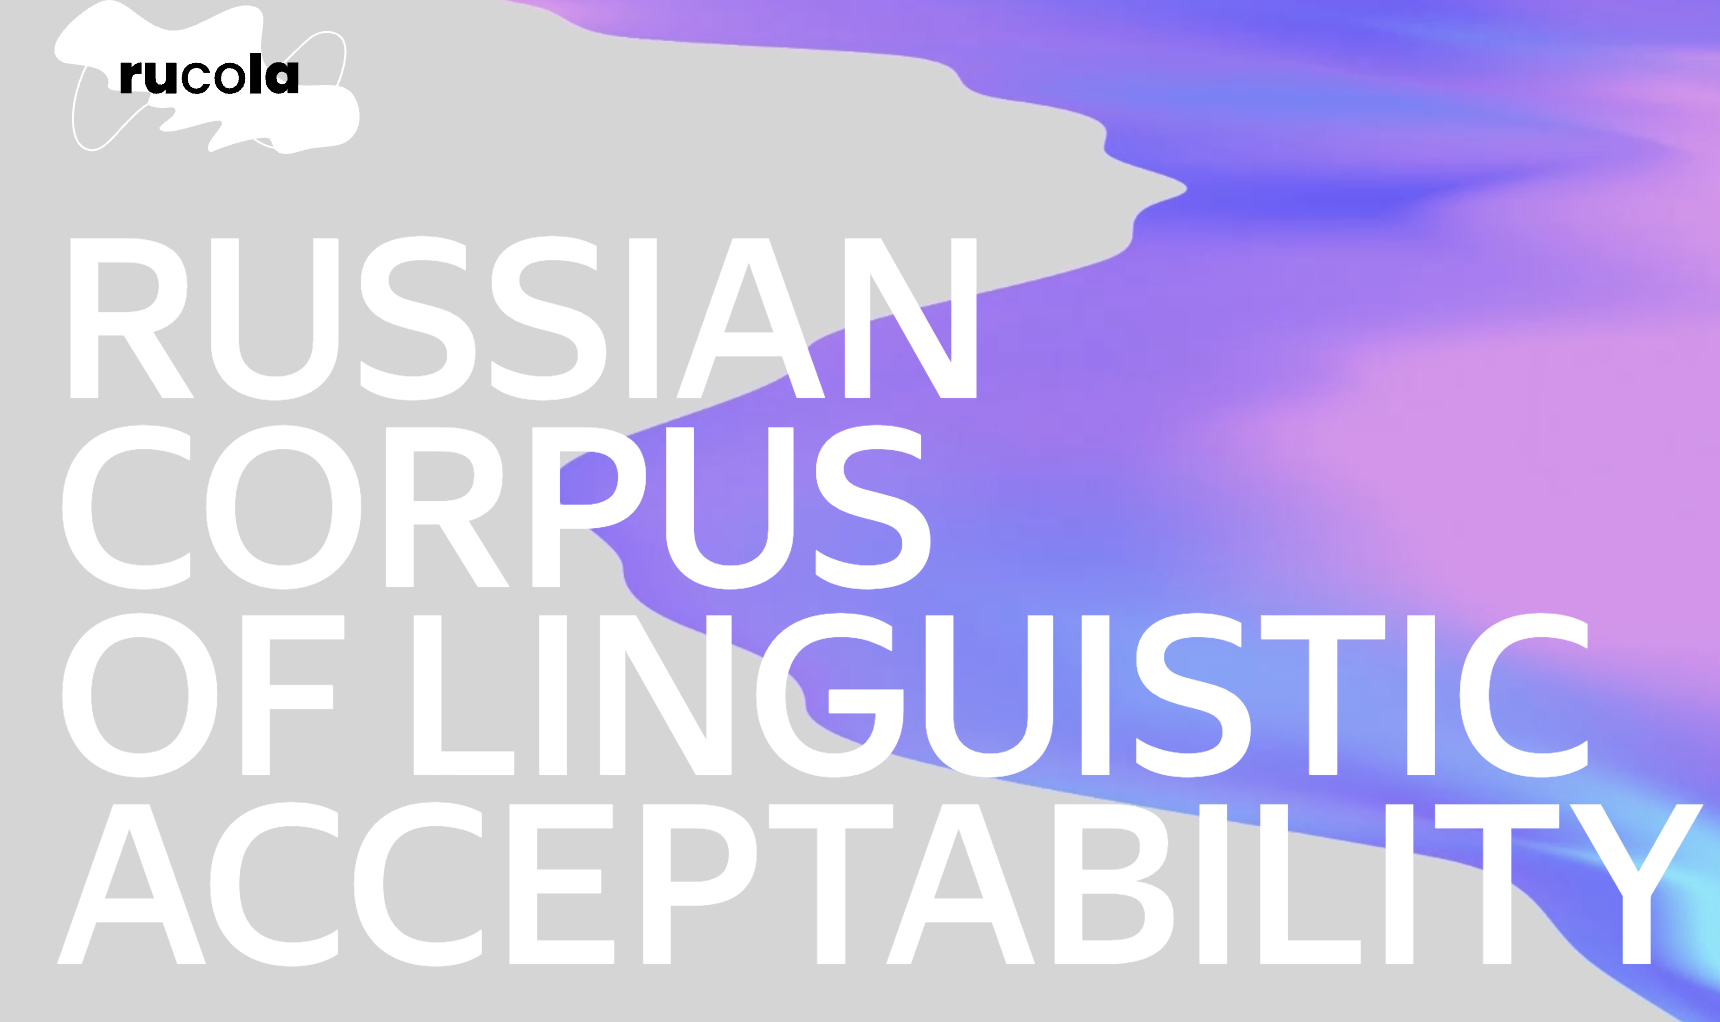

### [7%] 1. Data analysis


* 1.1  (5%) [Download](https://github.com/RussianNLP/RuCoLA/tree/main/data) the data(you need only `in_domain_train.csv` for training and  `in_domain_dev.csv` for the evaluation) and calculate basic statistics (example number, class distribution, mean sentence length, number of unique words, etc.) and make visualizations, if necessary.

* 1.2.  (2%) Split the data from `in_domain_train.csv` into train and val (`val_size = 10%`). Do not forget to fix `random_state` for reproducibility.



### [10%] 2. Fine-tune RuBERT

* 2.0 Study the [tutorial](https://mccormickml.com/2019/07/22/BERT-fine-tuning/) on BERT model fine-tuning.

**Note:** this part is not graded. However, you may find the material from the tutorial useful  for the successful task completion.

* 2.1 Take RuBert model (BERT for the Russian language). You may use any ofthe BERT-like models for the Russian language from [Hugging Face](https://huggingface.co/) project. For example, you may use [`sberbank-ai/ruBert-base`](https://huggingface.co/sberbank-ai/ruBert-base) or [`DeepPavlov/rubert-base-cased`](https://huggingface.co/DeepPavlov/rubert-base-cased).


* 2.2   (5%) Fine-tune RuBERT on RuCoLa train part created in 1.2. Do not forget about validation in process of training on val set created in 1.2. Select optimal epochs number, using the statistics on the val set.

* 2.3  (5%) Evaluate your fine-tuned model (use accuracy and MCC metrics and `in_domain_dev.csv` for the evaluation), analyze the results and make conclusions.



### [10%] 3. Fine-tune mBERT on RuCoLa

* 3.1 Now take a multilingual BERT model (BERT for the Russian language), or simply [mBERT](https://huggingface.co/bert-base-multilingual-cased) from [Hugging Face](https://huggingface.co/) project.


* 3.2   (5%) Similarly to 2, fine-tune mBERT on RuCoLa train part created in 1.2. Do not forget about validation in process of training on val set created in 1.2. Select optimal epochs number, using the statistics on the val set.

* 3.3  (5%) Evaluate your fine-tuned model (use accuracy and MCC metrics and `in_domain_dev.csv` for the evaluation), analyze the results and make conclusions.


### [13%] 4. Fine-tune mBERT on RuCoLa

* 4.1 (3%) Augment the training data with English examples from [CoLa](https://nyu-mll.github.io/CoLA/) dataset, which is the English analogue of RuCoLa (you probably know it if you studies the tutorial in 2.0). You need `in_domain_train.tsv` which can be found [here](https://github.com/nyu-mll/CoLA-baselines/tree/master/acceptability_corpus/cola_public/raw).


* 4.2   (5%) Similarly to 3, fine-tune mBERT from 2.1 on RuCoLa train part created in 1.2 + `in_domain_train.tsv` from CoLa dataset. Do not forget about validation in process of training on val set created in 1.2. Select optimal epochs number, using the statistics on the val set.

* 4.3  (5%) Evaluate your fine-tuned model (use accuracy and MCC metrics and `in_domain_dev.csv` for the evaluation), analyze the results and make conclusions.


### [10%] 5. Summary & results analysis


* 5.1    (5%) Compare the results of the all the tested models. First, compare them between each other, then with other models on [RuCoLa leaderboard](https://rucola-benchmark.com/leaderboard). Do not forget to mention, how the English data influences mBERT results.


* 5.2    (5%) Propose, how you may improve the model score (write at least three ideas).

### General Requirements

* You should provide a solution in the form of the Jupyter Notebook with code cells and markdown cells (with text)
* Make sure that the instructor can run all the cells to reproduce your results
* Clearly answer each question, perform the required actions from the task. Explain your decisions if you choose to use some techniques
* Provide links to the tutorials you use for reference.


##1. Data analysis

###1.1 Download the data(you need only in_domain_train.csv for training and in_domain_dev.csv for the evaluation) and calculate basic statistics (example number, class distribution, mean sentence length, number of unique words, etc.) and make visualizations, if necessary.

In [23]:
!git clone https://github.com/RussianNLP/RuCoLA.git

Cloning into 'RuCoLA'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 73 (delta 30), reused 52 (delta 22), pack-reused 0
Receiving objects: 100% (73/73), 944.21 KiB | 2.64 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [24]:
train_data = pd.read_csv('/content/RuCoLA/data/in_domain_train.csv')
test_data = pd.read_csv('/content/RuCoLA/data/in_domain_dev.csv')

In [25]:
train_data.head()

,id,sentence,acceptable,error_type,detailed_source
0,0,"Вдруг решетка беззвучно поехала в сторону, и н...",1,0,Paducheva2004
1,1,Этим летом не никуда ездили.,0,Syntax,Rusgram
2,2,Только Иван выразил какую бы то ни было готовн...,1,0,Paducheva2013
3,3,"Теперь ты видишь собственными глазами, как тут...",1,0,Paducheva2010
4,4,На поверку вся теория оказалась полной чепухой.,1,0,Paducheva2010


In [26]:
print(f'Train examples: {len(train_data)}\nTest examples: {len(test_data)}')

Train examples: 7869
Test examples: 983


In [27]:
print("Train data acceptability distribution:\n",train_data['acceptable'].value_counts(normalize=True))
print("Test data acceptability distribution:\n",test_data['acceptable'].value_counts(normalize=True))

Train data acceptability distribution:
 1    0.745203
0    0.254797
Name: acceptable, dtype: float64
Test data acceptability distribution:
 1    0.745677
0    0.254323
Name: acceptable, dtype: float64


In [28]:
print("Train data acceptability distribution:\n",train_data['acceptable'].value_counts())
print("Test data acceptability distribution:\n",test_data['acceptable'].value_counts())

Train data acceptability distribution:
 1    5864
0    2005
Name: acceptable, dtype: int64
Test data acceptability distribution:
 1    733
0    250
Name: acceptable, dtype: int64


Calculate weights for imbalanced classification

In [29]:
weights=[train_data['acceptable'].shape[0] / (2 * train_data[train_data['acceptable']==0].shape[0]),
         train_data['acceptable'].shape[0] / (2 * train_data[train_data['acceptable']==1].shape[0])]
weights

[1.9623441396508727, 0.6709583901773534]

In [30]:
train_unique_words = set(' '.join(train_data['sentence']).split())
test_unique_words = set(' '.join(test_data['sentence']).split())

In [31]:
print(f'Length of unique words for: \n>>>Train: {len(train_unique_words)}\n>>>Test: {len(test_unique_words)}')

Length of unique words for: 
>>>Train: 23014
>>>Test: 4576


In [32]:
translator = str.maketrans('', '', string.punctuation)

train_data['symbols'] = train_data.sentence.apply(lambda x: len(x))
test_data['symbols'] = test_data.sentence.apply(lambda x: len(x))

train_data['words'] = train_data.sentence.apply(lambda x: len(x.translate(translator).split()))
test_data['words'] = test_data.sentence.apply(lambda x: len(x.translate(translator).split()))

In [33]:
train_data

,id,sentence,acceptable,error_type,detailed_source,symbols,words
0,0,"Вдруг решетка беззвучно поехала в сторону, и н...",1,0,Paducheva2004,141,20
1,1,Этим летом не никуда ездили.,0,Syntax,Rusgram,28,5
2,2,Только Иван выразил какую бы то ни было готовн...,1,0,Paducheva2013,58,10
3,3,"Теперь ты видишь собственными глазами, как тут...",1,0,Paducheva2010,54,8
4,4,На поверку вся теория оказалась полной чепухой.,1,0,Paducheva2010,47,7
...,...,...,...,...,...,...,...
7864,7864,Установки не было введено в действие.,0,Semantics,Paducheva2004,37,6
7865,7865,"Конечно, против такой системы ценностей решите...",0,Semantics,Paducheva2013,151,17
7866,7866,Симптомов болезни не исчезло.,0,Semantics,Paducheva2013,29,4
7867,7867,Послезавтра температура у больного снижается д...,0,Semantics,Rusgram,54,7


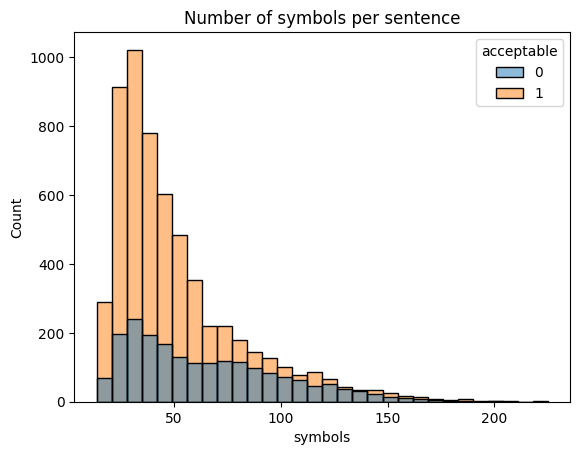

In [34]:
sns.histplot(data=train_data,x="symbols", bins=30, hue='acceptable')
plt.title('Number of symbols per sentence')
plt.show()

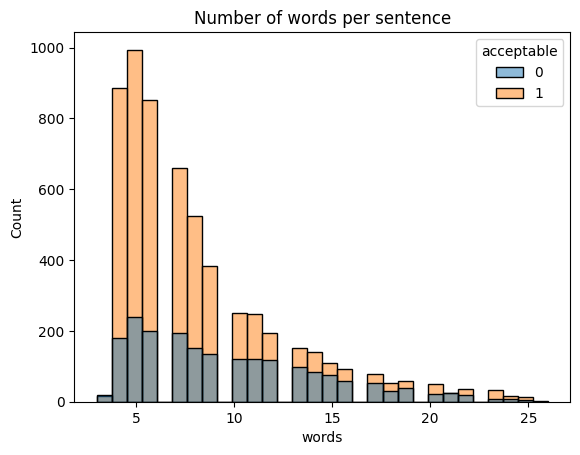

In [35]:
sns.histplot(data=train_data,x="words", bins=30, hue='acceptable')
plt.title('Number of words per sentence')
plt.show()

In [36]:
print(f"Mean sample words per sentence train: {train_data.words.mean():.2f}\nMean sample words per sentence test: {test_data.words.mean():.2f}")

Mean sample words per sentence train: 8.55
Mean sample words per sentence test: 8.40


###1.2. Split the data from in_domain_train.csv into train and val (val_size = 10%). Do not forget to fix random_state for reproducibility.

In [37]:
random_seed = 42
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=random_seed, stratify=train_data['acceptable'])

##2. Fine-tune RuBERT


###2.0 Study the tutorial on BERT model fine-tuning.
Note: this part is not graded. However, you may find the material from the tutorial useful for the successful task completion.

Done

###2.1 Take RuBert model (BERT for the Russian language). You may use any ofthe BERT-like models for the Russian language from Hugging Face project. For example, you may use sberbank-ai/ruBert-base or DeepPavlov/rubert-base-cased.


####Complete datasets and dataloaders using berttokenizer with pretrained sberbank-ai/ruBert-base

In [38]:
pretrain_ = 'DeepPavlov/rubert-base-cased'
# pretrain_ = 'sberbank-ai/ruBert-base'

In [39]:
tokenizer = BertTokenizer.from_pretrained(pretrain_)

class CustomDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=64):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sentence = self.data.iloc[idx]["sentence"]
        label = self.data.iloc[idx]["acceptable"]

        encoding = self.tokenizer.encode_plus(
            sentence,
            add_special_tokens=True,
            padding="max_length",
            max_length=self.max_length,
            return_attention_mask=True,
            return_tensors="pt",
        )

        input_ids = encoding["input_ids"]
        attention_mask = encoding["attention_mask"]

        return {
            "input_ids": input_ids.squeeze(),
            "attention_mask": attention_mask.squeeze(),
            "label": torch.tensor(label),
        }

train_dataset = CustomDataset(train_data, tokenizer)
val_dataset = CustomDataset(val_data, tokenizer)
test_dataset = CustomDataset(test_data, tokenizer)

batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)


In [40]:
train_dataset[0]

{'input_ids': tensor([  101,   839,  1699, 32889, 20471,   876, 78828,   876,   132,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'label': tensor(1)}

In [41]:
class CustomBertForSequenceClassification(nn.Module):
    def __init__(self, pretrain_, num_labels):
        super(CustomBertForSequenceClassification, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained(pretrain_, num_labels=num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        return outputs

num_epochs = 10
num_labels = 2

model = CustomBertForSequenceClassification(pretrain_, num_labels=num_labels)
optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=len(train_dataloader) * num_epochs,
)



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

pos_weight=torch.FloatTensor(weights).to(device)
criterion = nn.CrossEntropyLoss(weight=pos_weight)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


### 2.2 Fine-tune RuBERT on RuCoLa train part created in 1.2. Do not forget about validation in process of training on val set created in 1.2. Select optimal epochs number, using the statistics on the val set.


In [42]:
best_val_mcc = -1.0
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch in train_dataloader:
        inputs = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_mask)
        logits = outputs.logits
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()
    avg_train_loss = total_loss / len(train_dataloader)

    model.eval()
    val_predictions = []
    val_true_labels = []
    with torch.no_grad():
        for batch in val_dataloader:
            inputs = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["label"].to(device)

            outputs = model(inputs, attention_mask=attention_mask)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1)
            val_predictions.extend(predictions.tolist())
            val_true_labels.extend(labels.tolist())

    val_accuracy = accuracy_score(val_true_labels, val_predictions)
    val_mcc = matthews_corrcoef(val_true_labels, val_predictions)

    print(f"Epoch {epoch + 1}/{num_epochs} - Train Loss: {avg_train_loss:.4f} - Val Acc: {val_accuracy:.4f} - Val MCC: {val_mcc:.4f}")

Epoch 1/10 - Train Loss: 0.6848 - Val Acc: 0.7319 - Val MCC: 0.0905
Epoch 2/10 - Train Loss: 0.6846 - Val Acc: 0.7446 - Val MCC: 0.0000
Epoch 3/10 - Train Loss: 0.6785 - Val Acc: 0.7294 - Val MCC: 0.1029
Epoch 4/10 - Train Loss: 0.6611 - Val Acc: 0.7459 - Val MCC: 0.1099
Epoch 5/10 - Train Loss: 0.6550 - Val Acc: 0.7535 - Val MCC: 0.2213
Epoch 6/10 - Train Loss: 0.6216 - Val Acc: 0.7446 - Val MCC: 0.2285
Epoch 7/10 - Train Loss: 0.5966 - Val Acc: 0.7230 - Val MCC: 0.2812
Epoch 8/10 - Train Loss: 0.5582 - Val Acc: 0.7268 - Val MCC: 0.2806
Epoch 9/10 - Train Loss: 0.5137 - Val Acc: 0.7598 - Val MCC: 0.3026
Epoch 10/10 - Train Loss: 0.4739 - Val Acc: 0.7624 - Val MCC: 0.3360


###2.3 Evaluate your fine-tuned model (use accuracy and MCC metrics and in_domain_dev.csv for the evaluation), analyze the results and make conclusions.

In [43]:
test_predictions = []
test_true_labels = []
with torch.no_grad():
    for batch in test_dataloader:
        inputs = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        outputs = model(inputs, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        test_predictions.extend(predictions.tolist())
        test_true_labels.extend(labels.tolist())

eval_accuracy = accuracy_score(test_true_labels, test_predictions)
eval_mcc = matthews_corrcoef(test_true_labels, test_predictions)

print(f"Evaluation Acc: {eval_accuracy:.4f} - Evaluation MCC: {eval_mcc:.4f}")


Evaluation Acc: 0.7650 - Evaluation MCC: 0.3237


We have good Accuracy score for base model on evaluation, but still MCC is not good, but still more valuable thatmany approaches.

## 3. Fine-tune mBERT on RuCoLa


### 3.1 Now take a multilingual BERT model (BERT for the Russian language), or simply mBERT from Hugging Face project.


In [44]:
pretrained_ = "bert-base-multilingual-cased"
tokenizer = BertTokenizer.from_pretrained(pretrained_)

class CustomMBERTForSequenceClassification(nn.Module):
    def __init__(self, num_labels):
        super(CustomMBERTForSequenceClassification, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        return outputs

num_epochs = 10
num_labels = 2

model = CustomMBERTForSequenceClassification(num_labels=num_labels)
optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=len(train_dataloader) * num_epochs,
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

pos_weight=torch.FloatTensor(weights).to(device)
criterion = nn.CrossEntropyLoss(weight=pos_weight)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [45]:
tokenizer = BertTokenizer.from_pretrained(pretrain_)

class CustomDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=64):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sentence = self.data.iloc[idx]["sentence"]
        label = self.data.iloc[idx]["acceptable"]

        encoding = self.tokenizer.encode_plus(
            sentence,
            add_special_tokens=True,
            padding="max_length",
            max_length=self.max_length,
            return_attention_mask=True,
            return_tensors="pt",
        )

        input_ids = encoding["input_ids"]
        attention_mask = encoding["attention_mask"]

        return {
            "input_ids": input_ids.squeeze(),
            "attention_mask": attention_mask.squeeze(),
            "label": torch.tensor(label),
        }

train_dataset = CustomDataset(train_data, tokenizer)
val_dataset = CustomDataset(val_data, tokenizer)
test_dataset = CustomDataset(test_data, tokenizer)

batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)


### 3.2 Similarly to 2, fine-tune mBERT on RuCoLa train part created in 1.2. Do not forget about validation in process of training on val set created in 1.2. Select optimal epochs number, using the statistics on the val set.

In [46]:
best_val_mcc = -1.0
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch in train_dataloader:
        inputs = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_mask)
        logits = outputs.logits
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()
    avg_train_loss = total_loss / len(train_dataloader)

    model.eval()
    val_predictions = []
    val_true_labels = []
    with torch.no_grad():
        for batch in val_dataloader:
            inputs = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["label"].to(device)

            outputs = model(inputs, attention_mask=attention_mask)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1)
            val_predictions.extend(predictions.tolist())
            val_true_labels.extend(labels.tolist())

    val_accuracy = accuracy_score(val_true_labels, val_predictions)
    val_mcc = matthews_corrcoef(val_true_labels, val_predictions)

    print(f"Epoch {epoch + 1}/{num_epochs} - Train Loss: {avg_train_loss:.4f} - Val Acc: {val_accuracy:.4f} - Val MCC: {val_mcc:.4f}")

Epoch 1/10 - Train Loss: 0.6850 - Val Acc: 0.6379 - Val MCC: 0.2152
Epoch 2/10 - Train Loss: 0.6726 - Val Acc: 0.6277 - Val MCC: 0.2268
Epoch 3/10 - Train Loss: 0.6536 - Val Acc: 0.7332 - Val MCC: 0.2204
Epoch 4/10 - Train Loss: 0.6094 - Val Acc: 0.4282 - Val MCC: 0.1131
Epoch 5/10 - Train Loss: 0.5041 - Val Acc: 0.6112 - Val MCC: 0.1460
Epoch 6/10 - Train Loss: 0.3707 - Val Acc: 0.6328 - Val MCC: 0.1017
Epoch 7/10 - Train Loss: 0.2524 - Val Acc: 0.6518 - Val MCC: 0.1584
Epoch 8/10 - Train Loss: 0.2002 - Val Acc: 0.6773 - Val MCC: 0.1679
Epoch 9/10 - Train Loss: 0.1479 - Val Acc: 0.6582 - Val MCC: 0.1314
Epoch 10/10 - Train Loss: 0.1285 - Val Acc: 0.6633 - Val MCC: 0.1554


### 3.3 Evaluate your fine-tuned model (use accuracy and MCC metrics and in_domain_dev.csv for the evaluation), analyze the results and make conclusions.

In [47]:
test_predictions = []
test_true_labels = []
with torch.no_grad():
    for batch in test_dataloader:
        inputs = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        outputs = model(inputs, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        test_predictions.extend(predictions.tolist())
        test_true_labels.extend(labels.tolist())

eval_accuracy = accuracy_score(test_true_labels, test_predictions)
eval_mcc = matthews_corrcoef(test_true_labels, test_predictions)

print(f"Evaluation Acc: {eval_accuracy:.4f} - Evaluation MCC: {eval_mcc:.4f}")

Evaluation Acc: 0.6653 - Evaluation MCC: 0.1637


Accuracy is good good for mvp of this model, but mcc is still low. Based on multilingual approach current MCC for one language training is giving not good results

## 4. Fine-tune mBERT on RuCoLa


### 4.1 Augment the training data with English examples from CoLa dataset, which is the English analogue of RuCoLa (you probably know it if you studies the tutorial in 2.0). You need in_domain_train.tsv which can be found here.


In [48]:
!git clone https://github.com/nyu-mll/CoLA-baselines.git

Cloning into 'CoLA-baselines'...
remote: Enumerating objects: 1164, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 1164 (delta 2), reused 0 (delta 0), pack-reused 1158
Receiving objects: 100% (1164/1164), 1.08 MiB | 3.22 MiB/s, done.
Resolving deltas: 100% (808/808), done.


In [49]:
train_data_en = pd.read_csv('/content/CoLA-baselines/acceptability_corpus/cola_public/raw/in_domain_train.tsv', sep='\t', header=None)
test_data_en = pd.read_csv('/content/CoLA-baselines/acceptability_corpus/cola_public/raw/in_domain_dev.tsv', sep='\t', header=None)

In [50]:
train_data_en = train_data_en[[3,1]].copy()
train_data_en.columns = ['sentence', 'acceptable']

test_data_en = test_data_en[[3,1]].copy()
test_data_en.columns = ['sentence', 'acceptable']


train_data_en.head()

,sentence,acceptable
0,"Our friends won't buy this analysis, let alone...",1
1,One more pseudo generalization and I'm giving up.,1
2,One more pseudo generalization or I'm giving up.,1
3,"The more we study verbs, the crazier they get.",1
4,Day by day the facts are getting murkier.,1


In [51]:
#Combine datasets and compute weights
train_data_ = pd.concat([train_data[train_data_en.columns], train_data_en], axis=0)
test_data_ = pd.concat([test_data[train_data_en.columns], test_data_en], axis=0)

weights=[train_data_['acceptable'].shape[0] / (2 * train_data_[train_data_['acceptable']==0].shape[0]),
         train_data_['acceptable'].shape[0] / (2 * train_data_[train_data_['acceptable']==1].shape[0])]
weights


[1.8043628808864265, 0.6916644544730555]

In [52]:
#split data
random_seed = 42
train_data_, val_data_ = train_test_split(train_data_, test_size=0.1, random_state=random_seed, stratify=train_data_['acceptable'])

### 4.2 Similarly to 3, fine-tune mBERT from 2.1 on RuCoLa train part created in 1.2 + in_domain_train.tsv from CoLa dataset. Do not forget about validation in process of training on val set created in 1.2. Select optimal epochs number, using the statistics on the val set.

In [53]:
pretrained_ = "bert-base-multilingual-cased"
tokenizer = BertTokenizer.from_pretrained(pretrained_)

class CustomMBERTForSequenceClassification(nn.Module):
    def __init__(self, num_labels):
        super(CustomMBERTForSequenceClassification, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        return outputs

num_epochs = 10
num_labels = 2

model = CustomMBERTForSequenceClassification(num_labels=num_labels)
optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=len(train_dataloader) * num_epochs,
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

pos_weight=torch.FloatTensor(weights).to(device)
criterion = nn.CrossEntropyLoss(weight=pos_weight)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [54]:
tokenizer = BertTokenizer.from_pretrained(pretrain_)

class CustomDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=64):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sentence = self.data.iloc[idx]["sentence"]
        label = self.data.iloc[idx]["acceptable"]

        encoding = self.tokenizer.encode_plus(
            sentence,
            add_special_tokens=True,
            padding="max_length",
            max_length=self.max_length,
            return_attention_mask=True,
            return_tensors="pt",
        )

        input_ids = encoding["input_ids"]
        attention_mask = encoding["attention_mask"]

        return {
            "input_ids": input_ids.squeeze(),
            "attention_mask": attention_mask.squeeze(),
            "label": torch.tensor(label),
        }

train_dataset = CustomDataset(train_data, tokenizer)
val_dataset = CustomDataset(val_data, tokenizer)
test_dataset = CustomDataset(test_data, tokenizer)

batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)


In [56]:
best_val_mcc = -1.0
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch in train_dataloader:
        inputs = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_mask)
        logits = outputs.logits
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()
    avg_train_loss = total_loss / len(train_dataloader)

    model.eval()
    val_predictions = []
    val_true_labels = []
    with torch.no_grad():
        for batch in val_dataloader:
            inputs = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["label"].to(device)

            outputs = model(inputs, attention_mask=attention_mask)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1)
            val_predictions.extend(predictions.tolist())
            val_true_labels.extend(labels.tolist())

    val_accuracy = accuracy_score(val_true_labels, val_predictions)
    val_mcc = matthews_corrcoef(val_true_labels, val_predictions)

    print(f"Epoch {epoch + 1}/{num_epochs} - Train Loss: {avg_train_loss:.4f} - Val Acc: {val_accuracy:.4f} - Val MCC: {val_mcc:.4f}")

Epoch 1/10 - Train Loss: 0.6667 - Val Acc: 0.5375 - Val MCC: 0.1972
Epoch 2/10 - Train Loss: 0.6439 - Val Acc: 0.6722 - Val MCC: 0.2213
Epoch 3/10 - Train Loss: 0.5963 - Val Acc: 0.6213 - Val MCC: 0.1752
Epoch 4/10 - Train Loss: 0.4968 - Val Acc: 0.6518 - Val MCC: 0.1556
Epoch 5/10 - Train Loss: 0.3778 - Val Acc: 0.6709 - Val MCC: 0.1102
Epoch 6/10 - Train Loss: 0.2938 - Val Acc: 0.6036 - Val MCC: 0.1226
Epoch 7/10 - Train Loss: 0.2340 - Val Acc: 0.6607 - Val MCC: 0.1065
Epoch 8/10 - Train Loss: 0.1928 - Val Acc: 0.6557 - Val MCC: 0.1164
Epoch 9/10 - Train Loss: 0.1694 - Val Acc: 0.6582 - Val MCC: 0.1028
Epoch 10/10 - Train Loss: 0.1683 - Val Acc: 0.6582 - Val MCC: 0.1028


### 4.3 Evaluate your fine-tuned model (use accuracy and MCC metrics and in_domain_dev.csv for the evaluation), analyze the results and make conclusions.

In [57]:
test_predictions = []
test_true_labels = []
with torch.no_grad():
    for batch in test_dataloader:
        inputs = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        outputs = model(inputs, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        test_predictions.extend(predictions.tolist())
        test_true_labels.extend(labels.tolist())

eval_accuracy = accuracy_score(test_true_labels, test_predictions)
eval_mcc = matthews_corrcoef(test_true_labels, test_predictions)

print(f"Evaluation Acc: {eval_accuracy:.4f} - Evaluation MCC: {eval_mcc:.4f}")

Evaluation Acc: 0.6643 - Evaluation MCC: 0.1423


We have good average accuracy for this types of model, but mcc is not increased from previous approach. But mostly i think it depends on data cleaning and normalization and this approach to fine-tuning is better on multilingual model pretrained weights

##5. Summary & results analysis


###5.1 Compare the results of the all the tested models. First, compare them between each other, then with other models on RuCoLa leaderboard. Do not forget to mention, how the English data influences mBERT results.


First model RuCoLa on 'DeepPavlov/rubert-base-cased' weights is most robust and well-trained model from all three models. It trained with accuracy ~70% and MCC ~32%, which is good for this task with not hardly implemented training loop and preprocessing elements.

Second model giving significantly worse result than the first model, reaching
MCC ~ 16%. Mostly it based on large multilingual model fine-tuning with only one language dataset trained on one language causing some overfitting. The best model results are still Accuracy ~70% and mcc ~ 20% that's good for training with this task

Third model reaching worse results with only 66% accuracy and 14% MCC. Mostly i think it's caused on preprocessing and language balance in dataset

The english entension of dataset giving more robust result with less overfitting, that generally means third model actually better than first model, but, need more data preparation to be well trained


Comparing to leaderboard table, second and third model are top28 reaching higher accuracy and mcc than other models below. Our first model is top22 based on MCC (basically mcc is more valuable metric in this task than accuracy, because more based on each class prediction)

###5.2 Propose, how you may improve the model score (write at least three ideas).

1. Firstly, remove stop words based on languages used in datasets and work out punctuation for each language

2. More accurate class balance should be added, or another weighting strategy. Also we should use language balance to get results higher

3. According to the paper, using out_of domain sentences will improve generalization and, maybe will reduce overfitting. Various technics of training also should be implied like grayzoning result probabilities at some specific percents to improve results

Links:

https://huggingface.co (various papers and tutorial notebooks)

https://pytorch.com

https://torchmetrics.readthedocs.io/

https://arxiv.org/abs/2210.12814

https://colab.research.google.com/github/huggingface/notebooks/blob/main/examples/image_classification.ipynb#scrollTo=G1bX4lGAO_d9

https://towardsdatascience.com/the-w3h-of-alexnet-vggnet-resnet-and-inception-7baaaecccc96

